# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

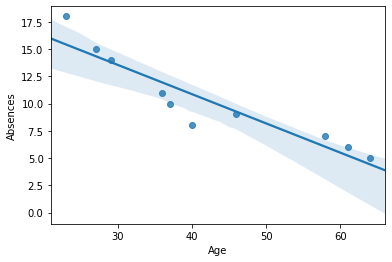

In [20]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#df = pd.read_csv('../data/absences.csv')

import seaborn as sns

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

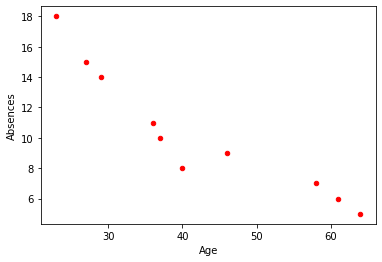

In [4]:
# a scatter plot comparing num_children and num_pets
df.plot(kind='scatter',x='Age',y='Absences',color='red')
plt.show()
sns.regplot(x="Age", y="Absences", data=df)

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [25]:
##the parameters inputs are the list for the absences Y, and ages X.
abse = df.Absences.values.tolist()
ages = df.Age.values.tolist()


def slope(x,y):
    numerator = 0
    denominator = 0
    mu_x = sum(x)/len(x) #mean of x: ages
    mu_y = sum(y)/len(y) #mean of y: absences
    for i,j in zip(x,y):
        numerator += ((j-mu_y)*(i-mu_x))
        denominator += (i-mu_x)**2
    m = numerator/denominator
    return m

m = slope(ages,abse)


def intercept(x,y,slope):
    m = slope(x,y)
    mu_x = sum(x)/len(x)
    mu_y = sum(y)/len(y)
    b = mu_y - m*mu_x
    return b

b = intercept(ages,abse,slope)

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [31]:
print(m)
print(str(b))

-0.2681088337033404
21.58738189891063


In [ ]:
from scipy import stats
X = df['Age']
Y = df['Absences']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

In [ ]:
negative slope, therefore sloping down.

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [46]:
from numpy import cov
import statistics

In [57]:
def mycov(X, Y):
    '''
    X is a list of values
    Y is a list of values
    x is the element in the X list
    y is the element in the Y list
    n is the number of items in the last
    '''
    n = len(X)
    addme = 0
    #ans = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)
    
    for i in range(n):
        addme += (X[i] - (sum(X)/len(X))) * (Y[i] - (sum(Y)/len(Y)))
    ans = addme * (1/(n-1))
    return ans


X = [1,6,9]
Y = [1,6,9]

#(sum(X)/len(X))
mycov(X,Y)





def mycoeff(X,Y):
    n = len(X)
    for i in range(n):
        addmex += (X[i] - (sum(X)/len(X))**2 )
    stdeviaX = ((addmex / (n-1)) ** 1/2)
    for j in range(n):
        addmey += (X[j] - (sum(Y)/len(Y))**2 )
    stdeviaY = ((addmeY / (n-1)) ** 1/2)    
    ans = (mycov(X, Y) / (stdeviaX * stdeviaY))
    return ans

X = [1,6,9]
Y = [1,6,9]
mycoeff(X,Y)

16.333333333333336

In [64]:
def mycoeff(X,Y):
    n = len(X)
    addmex = 0
    addmey = 0
    for i in range(n):
        addmex += ((X[i] - (sum(X)/len(X)))**2 )
        addmey += ((Y[i] - (sum(Y)/len(Y)))**2 )
    stdeviaX = ((addmex / (n-1)) ** 1/2)
    stdeviaY = ((addmey / (n-1)) ** 1/2)    
    ans = (mycov(X, Y) / (stdeviaX * stdeviaY))
    return ans
X = [1,6,9]
Y = [1,6,9]
mycoeff(X,Y)

0.24489795918367346

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [50]:
from numpy import cov
#covariance = cov(df['Age'], df['Absences'])
covariance = cov(X, Y)
covariance

array([[1., 1.],
       [1., 1.]])

In [65]:
from scipy.stats import pearsonr
#corr, _ = pearsonr(df['Age'], df['Absences'])
corr, _ = pearsonr(X, Y)
print (corr)

1.0


In [ ]:
# your comments here

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
# your comments here

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [41]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [42]:
print(ironbeers_df[['X', 'Y']].cov())
print(ironbeers_df[['X', 'Y']].corr())

           X     Y
X  18.857143  12.0
Y  12.000000   8.0
          X         Y
X  1.000000  0.977008
Y  0.977008  1.000000


In [16]:
# your comments here
ironbeers_df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,9


#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

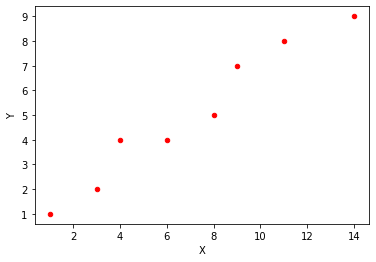

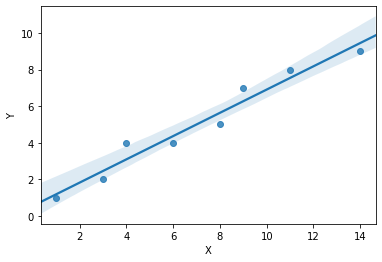

In [43]:
ironbeers_df.plot(kind='scatter',x='X',y='Y',color='red')
plt.show()
sns.regplot(x="X", y="Y", data=ironbeers_df)

In [ ]:
positive co-efficient and y intercept > 0.

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [44]:
from scipy import stats
X = ironbeers_df['X']
Y = ironbeers_df['Y']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 0.6363636363636364
The intercept is: 0.5454545454545459


In [ ]:
# your comments here
matches what I typed above...

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
# your comments here

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here